In [2]:
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from src.config import RAW_DATA_DIR

In [3]:
if not RAW_DATA_DIR.exists():
    os.chdir("..")

In [4]:
df = pd.read_csv(RAW_DATA_DIR / "filtered.tsv", sep="\t", index_col=(0,))
df.head()

,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.785171,0.010309,0.014195,0.981983
1,Now you're getting nasty.,you're becoming disgusting.,0.749687,0.071429,0.065473,0.999039
2,"Well, we could spare your life, for one.","well, we can spare your life.",0.919051,0.268293,0.213313,0.985068
3,"Ah! Monkey, you've got to snap out of it.","monkey, you have to wake up.",0.664333,0.309524,0.053362,0.994215
4,I've got orders to put her down.,I have orders to kill her.,0.726639,0.181818,0.009402,0.999348


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577777 entries, 0 to 577776
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   reference    577777 non-null  object 
 1   translation  577777 non-null  object 
 2   similarity   577777 non-null  float64
 3   lenght_diff  577777 non-null  float64
 4   ref_tox      577777 non-null  float64
 5   trn_tox      577777 non-null  float64
dtypes: float64(4), object(2)
memory usage: 30.9+ MB


In [6]:
df.describe()

,similarity,lenght_diff,ref_tox,trn_tox
count,577777.000000,577777.000000,577777.000000,577777.000000
mean,0.758469,0.157652,0.541372,0.434490
std,0.092695,0.108057,0.457571,0.458904
min,0.600001,0.000000,0.000033,0.000033
25%,0.681105,0.066667,0.012171,0.000707
50%,0.754439,0.141791,0.806795,0.085133
75%,0.831244,0.238095,0.990469,0.973739
max,0.950000,0.400000,0.999724,0.999730


The ranges of `ref_tox` and `trn_tox` look suspicious, let us check distributions of these columns:

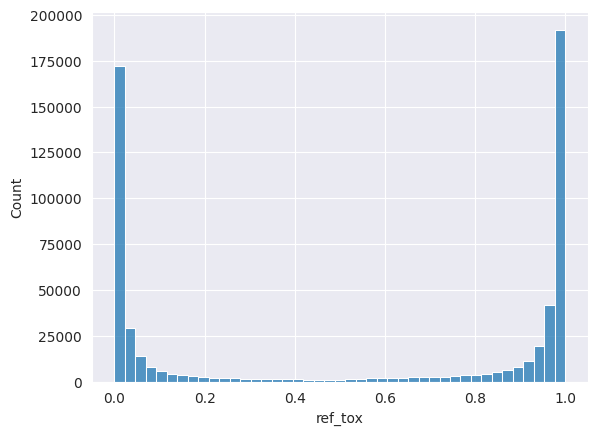

In [7]:
sns.histplot(df, x="ref_tox")
plt.show()

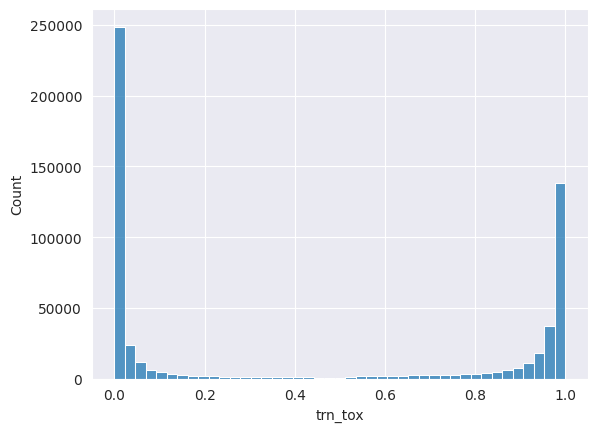

In [8]:
sns.histplot(df, x="trn_tox")
plt.show()

As we can see on plots above, there are a lot of values of `ref_tox` that are close to 0 and a lot of values of `trn_tox` close to 1. Let us check if there exist records where `trn_tox` > `ref_tox`: 

In [9]:
increased_toxicity = df[df.trn_tox > df.ref_tox]
increased_toxicity.head()

,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.785171,0.010309,0.014195,0.981983
1,Now you're getting nasty.,you're becoming disgusting.,0.749687,0.071429,0.065473,0.999039
2,"Well, we could spare your life, for one.","well, we can spare your life.",0.919051,0.268293,0.213313,0.985068
3,"Ah! Monkey, you've got to snap out of it.","monkey, you have to wake up.",0.664333,0.309524,0.053362,0.994215
4,I've got orders to put her down.,I have orders to kill her.,0.726639,0.181818,0.009402,0.999348


In [10]:
increased_toxicity.shape

(258635, 6)

As we can see, almost half of the records have the `translation` more toxic than the reference. I decided to swap translation direction for these records:

In [12]:
from src.data.preprpocess import swap_translation_direction

swapped_df = swap_translation_direction(df)
swapped_df.head()

,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,"if Alkar floods her with her mental waste, it ...","If Alkar is flooding her with psychic waste, t...",0.785171,0.010309,0.981983,0.014195
1,you're becoming disgusting.,Now you're getting nasty.,0.749687,0.071429,0.999039,0.065473
2,"well, we can spare your life.","Well, we could spare your life, for one.",0.919051,0.268293,0.985068,0.213313
3,"monkey, you have to wake up.","Ah! Monkey, you've got to snap out of it.",0.664333,0.309524,0.994215,0.053362
4,I have orders to kill her.,I've got orders to put her down.,0.726639,0.181818,0.999348,0.009402


Let us visualize data with word clouds:

In [17]:
from src.visualization.make_wordcloud import make_wordcloud

ref_wordcloud = make_wordcloud(df.reference)
trn_wordcloud = make_wordcloud(df.translation)

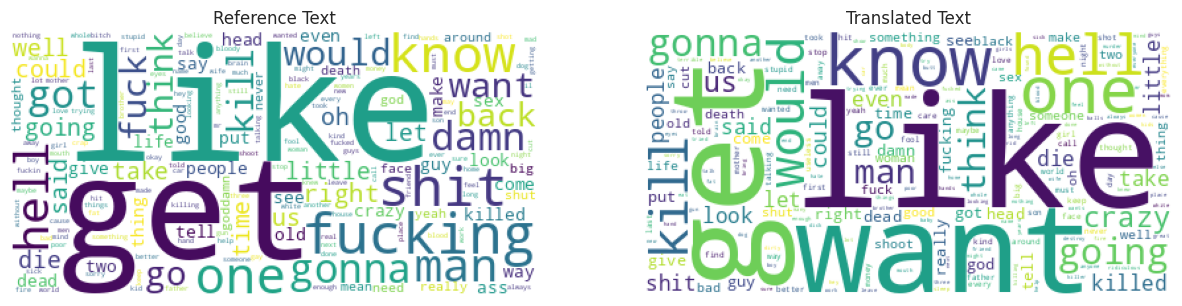

In [24]:
_, axes = plt.subplots(1, 2, figsize=(15, 10))

axes[0].imshow(ref_wordcloud)
axes[0].axis("off")
axes[0].set_title("Reference Text")

axes[1].imshow(trn_wordcloud)
axes[1].axis("off")
axes[1].set_title("Translated Text")
plt.show()

In [25]:
preprocessed_ref_wordcloud = make_wordcloud(swapped_df.reference)
preprocessed_trn_wordcloud = make_wordcloud(swapped_df.translation)

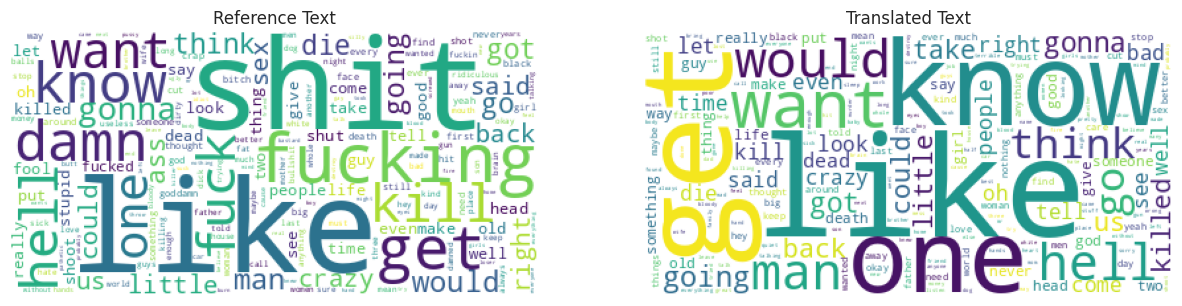

In [26]:
_, axes = plt.subplots(1, 2, figsize=(15, 10))

axes[0].imshow(preprocessed_ref_wordcloud)
axes[0].axis("off")
axes[0].set_title("Reference Text")

axes[1].imshow(preprocessed_trn_wordcloud)
axes[1].axis("off")
axes[1].set_title("Translated Text")
plt.show()

As we can see on the clouds above, the preprocess step moved a lot of toxic words from translated texts to reference ones.